# Importing libraries

In [1]:
# At first we will import necessary libraries

import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

In [2]:
# importing necessary libraries for pictorial representation:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm

# Training Dataset

In [3]:
#Now, we will load the training dataset and preview it

train=pd.read_csv(r'C:\Users\PC\Jupyter Notebooks\Prediction Of Phone Prices\train.csv')
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Data Preprocesssing

In [4]:
# Findind the total size of Train Dataset:

print("Train Dataframe size:")
train.shape

Train Dataframe size:


(2000, 21)

In [5]:
# detecting missing values for an array-like object:

for i in train.columns:
    bser=pd.isnull(train[i])
    
train[bser]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [6]:
pd.isnull(train).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# Finding datatypes of each field:

train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
# Printing concise summary of our dataset or Data Analysis:
# Training Dataset:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# We took a very good dataset, hence as it consists non-null values. So no cleaning of dataset is required

In [10]:
# Generating the descriptive statistics of out dataset:
# Training Dataset:

train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
# Now seeing the different values in our target dataset as our problem
# is Multiple Classification Problem

train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [12]:
# From above we can observe that Ram has the highest correlation value, i.e.,
# as ram value increases price also increases and 
# negative correlation between weight of phone and price, i.e,
# as weight increases price decreases

In [13]:
# Now, verifying above correlation by using the highest price range and its columns

train.loc[train["price_range"]==3.0].head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,...,984,1850,3554,10,9,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3


In [14]:
# Plotting the correlation matrix of our training dataset:

train.corr(method='pearson')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [15]:
# To simplify classification we'll firstly reduce the task up to 
# a binary classification and change [0, 1, 2, 3] classes to [0, 1]

y=train.price_range

y=y.replace({1:0, 2:1, 3:1, 4:1})

print(y)

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64


In [16]:
# Now, we will remove the target variable from our dataset

x=train.drop('price_range', axis=1)

print(x)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [17]:
# Saving seed

divide_seed=np.random.randint(1,100)

print(divide_seed)

3


In [18]:
# And now split the data via 7:3

x_train, x_test, y_train, y_test= model_selection.train_test_split(x, y, test_size=0.3, random_state=divide_seed)

# Checking if they spilitted correctly

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1400
600
1400
600


# Normalisation Of Dataset

In [19]:
# Also, we need to normalise and scale the data, so we'll use Scaler:

scaler= StandardScaler()

# We normalize train sample
scaler.fit(x_train)
x_train=scaler.transform(x_train)

# And rest sample
scaler.fit(x_test)
x_test=scaler.transform(x_test)

# Checking it:
print("x_train:")
print(x_train)

print()

print("x_test:")
print(x_test)

x_train:
[[-1.25964841 -0.98159786  1.71187932 ...  0.56085113 -0.98722446
  -1.02458791]
 [-1.53976103 -0.98159786  0.48854664 ...  0.56085113  1.01294087
  -1.02458791]
 [-0.8033359   1.01874713 -1.22411911 ...  0.56085113 -0.98722446
   0.97600215]
 ...
 [-1.35904321  1.01874713  0.12154684 ...  0.56085113 -0.98722446
  -1.02458791]
 [-1.25513046  1.01874713  0.48854664 ...  0.56085113 -0.98722446
   0.97600215]
 [-1.23028176  1.01874713 -0.73478604 ...  0.56085113  1.01294087
   0.97600215]]

x_test:
[[ 1.69444506  0.9900495   0.28075411 ... -1.79592653 -1.05131497
  -0.9900495 ]
 [ 1.54576572 -1.0100505  -0.83073578 ... -1.79592653  0.95118973
   1.0100505 ]
 [ 1.36223965 -1.0100505  -0.33674027 ... -1.79592653 -1.05131497
   1.0100505 ]
 ...
 [-1.06541528 -1.0100505  -0.95423466 ... -1.79592653  0.95118973
  -0.9900495 ]
 [-0.18263167  0.9900495  -1.32473129 ...  0.55681565 -1.05131497
  -0.9900495 ]
 [ 0.41208571 -1.0100505  -0.83073578 ...  0.55681565 -1.05131497
   1.0100505 ]

In [20]:
# Finding correlation among the target label and other columns

for i in train.columns:
    print(i, train[i].corr(train['price_range'], method='pearson'))

battery_power 0.20072261211373102
blue 0.020572854061418504
clock_speed -0.006605690881732071
dual_sim 0.017444479237224732
fc 0.02199820777690427
four_g 0.0147717114172394
int_memory 0.04443495938898743
m_dep 0.0008530365050864312
mobile_wt -0.030302171314386415
n_cores 0.004399274799457285
pc 0.03359930021353949
px_height 0.1488575550004218
px_width 0.16581750172625515
ram 0.9170457362649905
sc_h 0.022986073167424414
sc_w 0.038711271664484154
talk_time 0.02185887116237479
three_g 0.023611216880045017
touch_screen -0.030411071898218043
wifi 0.018784812012789004
price_range 1.0


In [21]:
# Now our data is ready to be used as a sample for predicting models

# Pictorial Representation Of Dataset

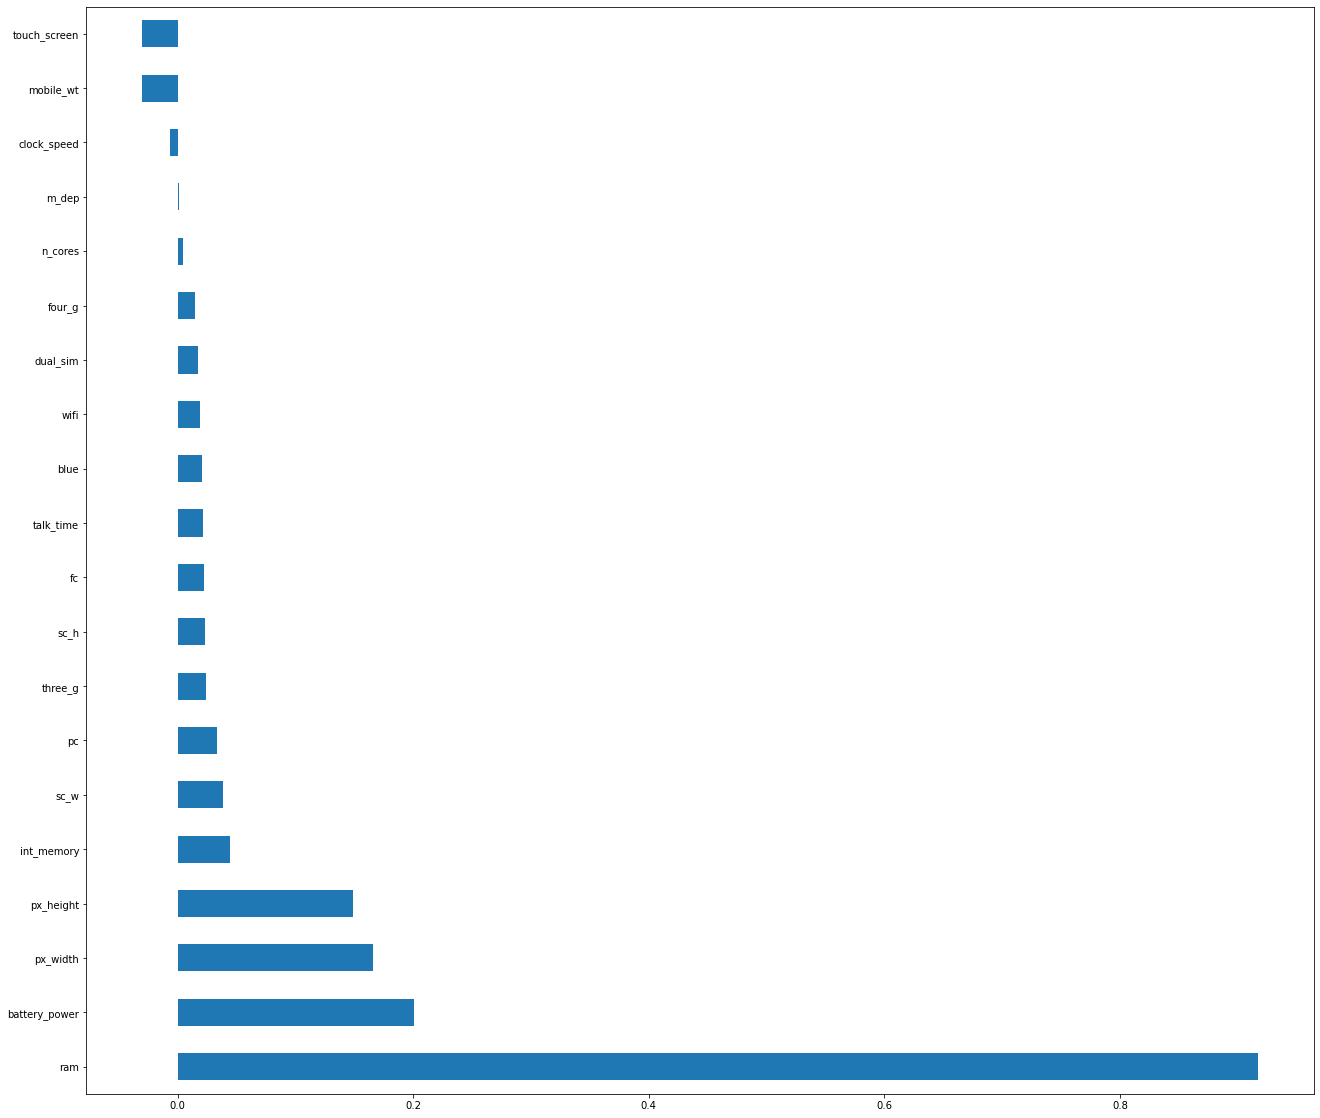

In [22]:
# Seeing above corelation graphically
corr=train.corr()
corr=corr.price_range
fig= figure(figsize=(22,20))
corr.sort_values(ascending=False)[1:].plot(kind='barh')

In [23]:
# From above we can observe that Ram has the highest correlation value, i.e.,
# as ram value increases price also increases and 
# negative correlation between weight of phone and price, i.e,
# as weight increases price decreases

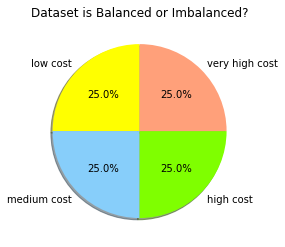

In [24]:
# Seeing out dataset is balanced or not:

labels=["low cost", "medium cost", "high cost", "very high cost"]
values = train['price_range'].value_counts().values
colors = ['yellow','lightskyblue','chartreuse', 'lightsalmon']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Dataset is Balanced or Imbalanced?')
plt.show()

In [25]:
# From above we can conclude that our dataset is balanced

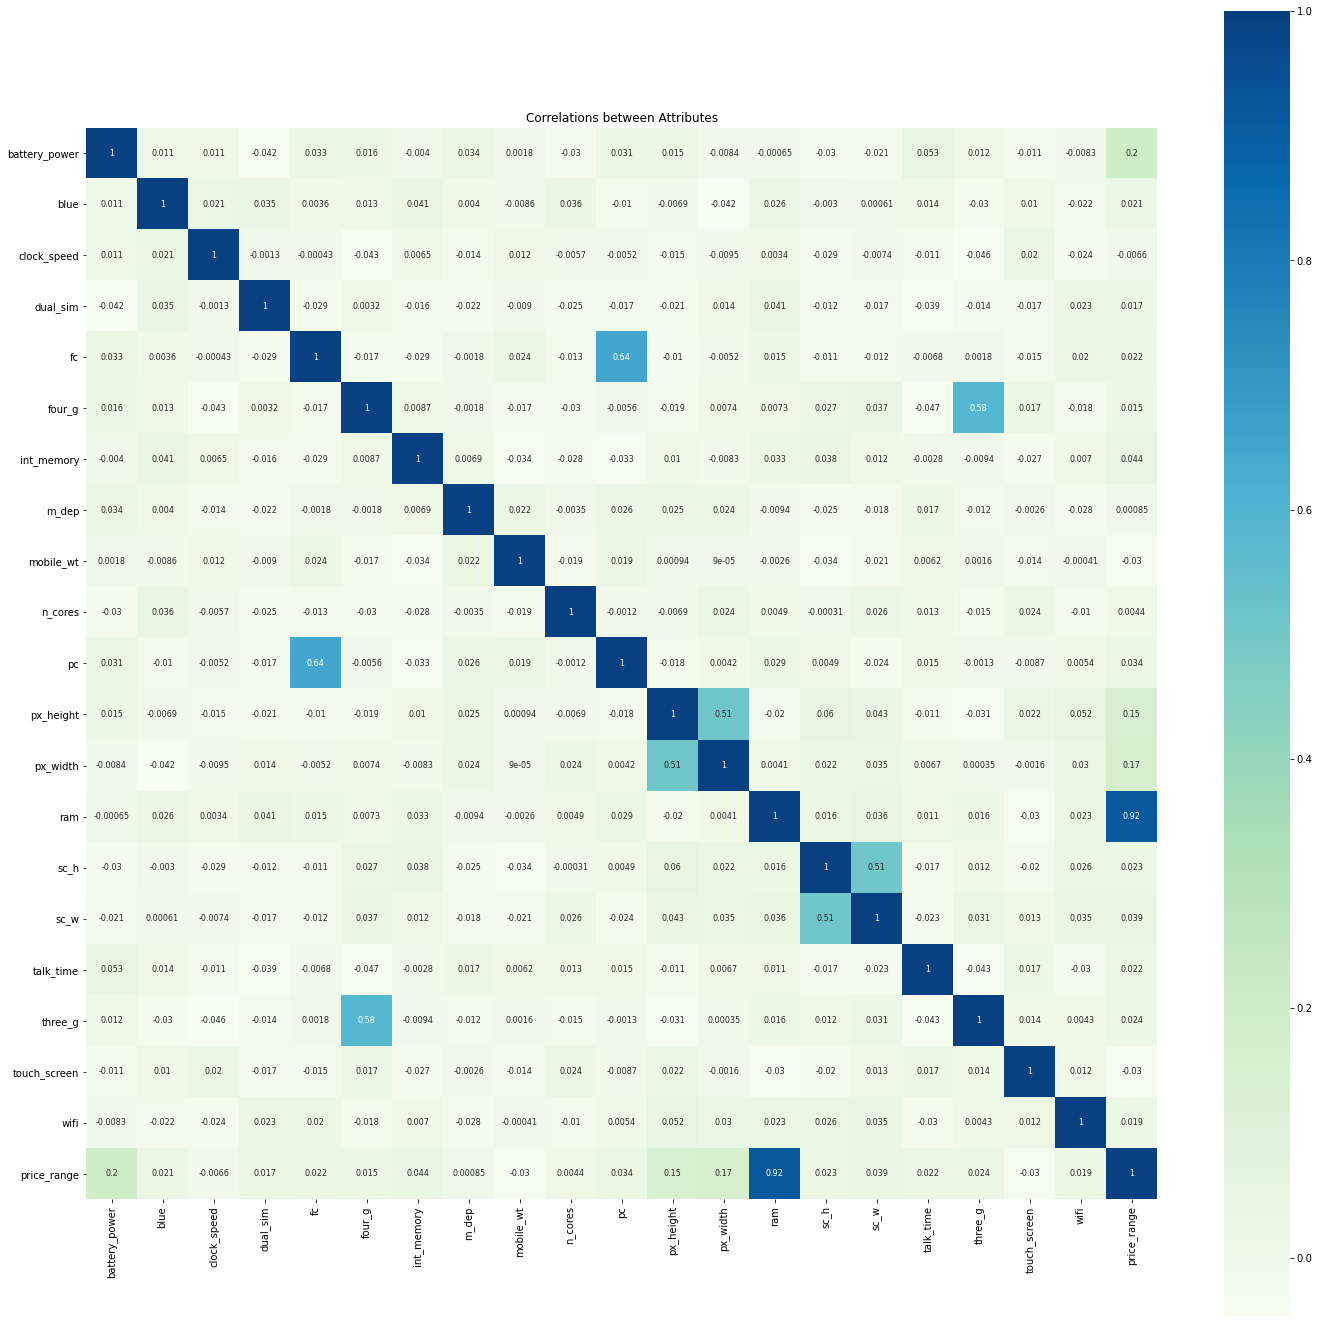

In [26]:
# Plotting Heat Map:

# sns.heatmap(train)
# plt.show()

fig = plt.subplots (figsize = (24, 24))
sns.heatmap(train.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

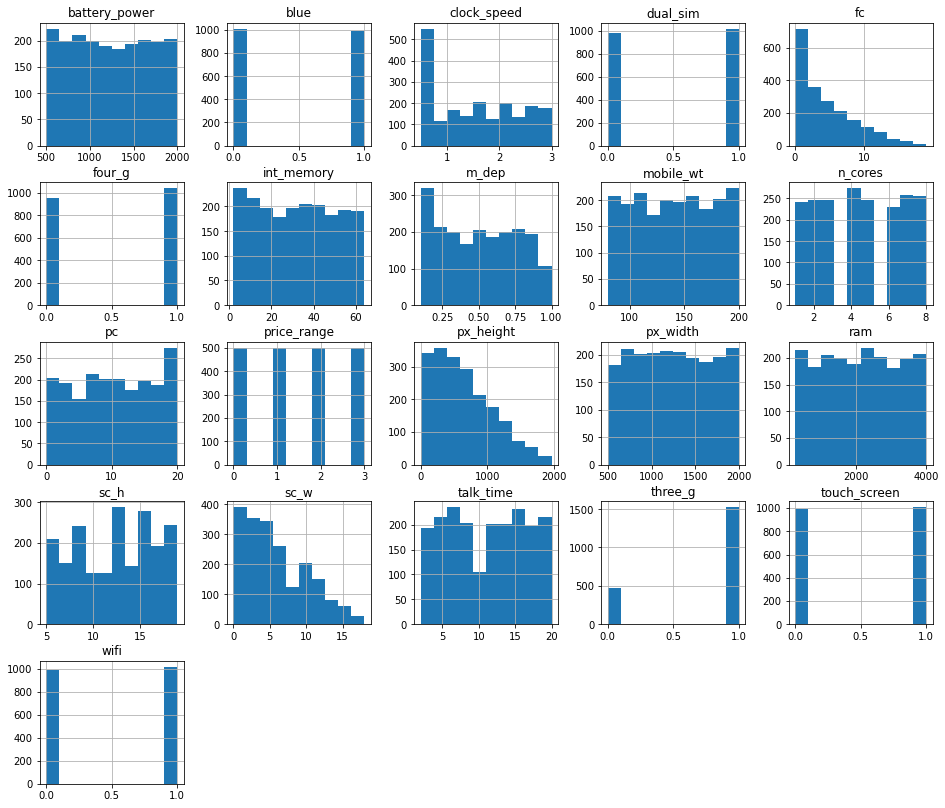

In [27]:
# Data visualisation

train.hist(sharex=False, sharey=False, figsize=(16,14))
plt.show()

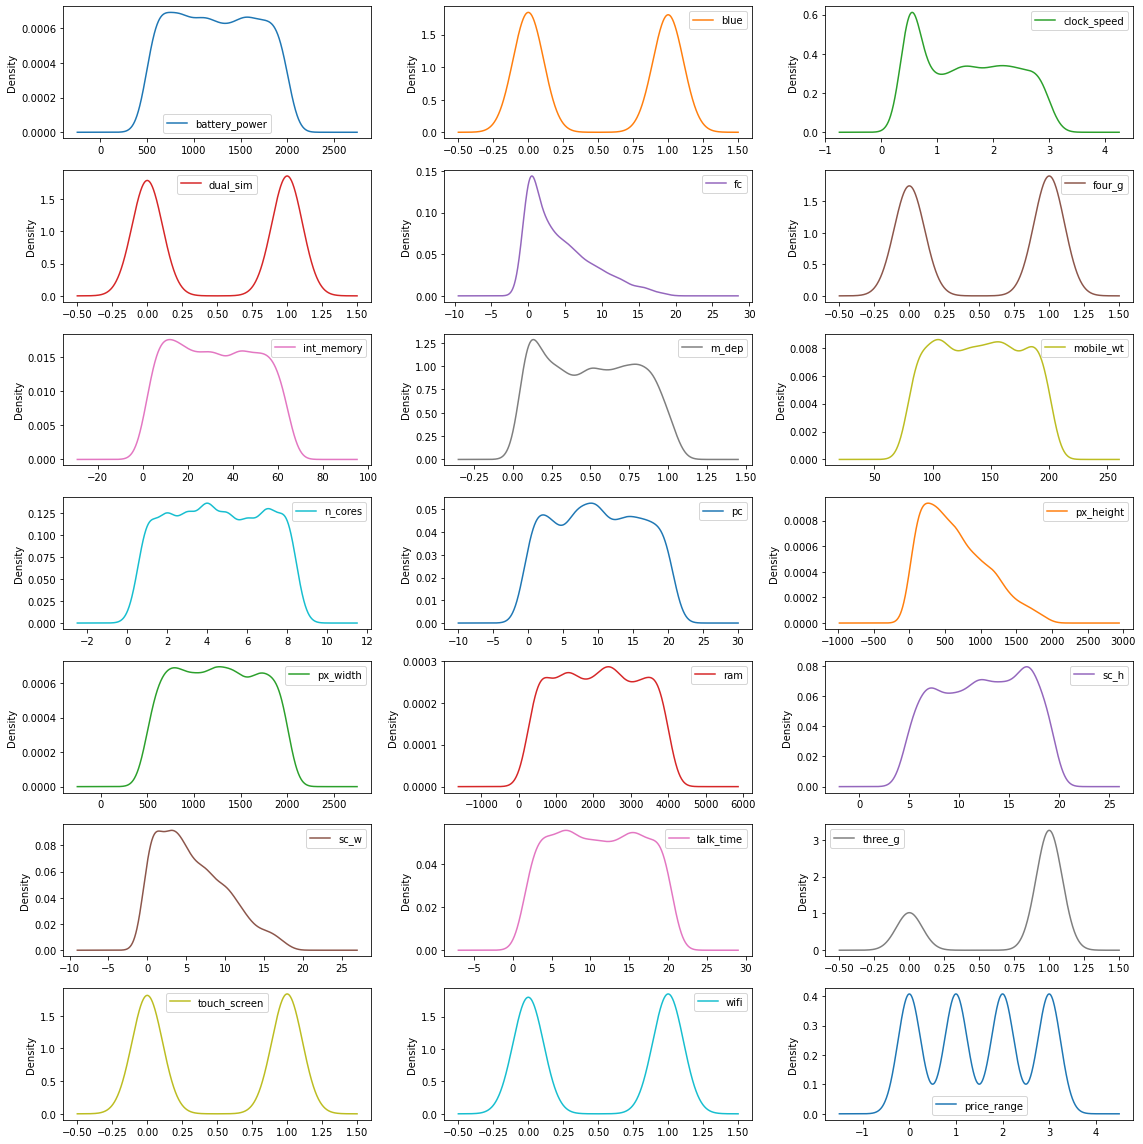

In [28]:
# Plotting density:

train.plot(kind='density', subplots=True, sharex=False, sharey=False, figsize=(16,16), layout=(7,3))
plt.tight_layout()
plt.show()

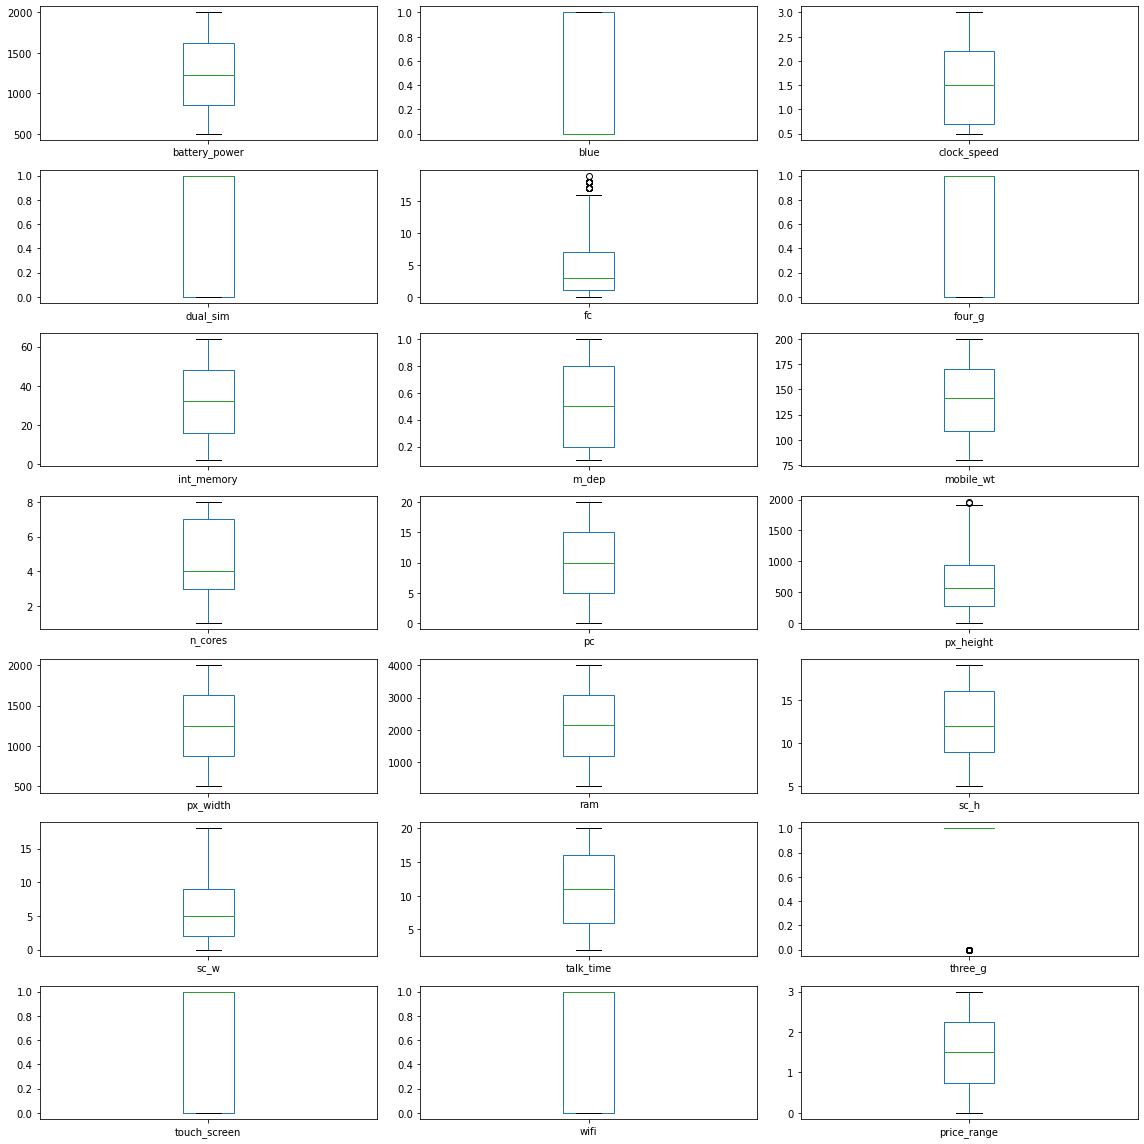

In [29]:
# Plotting Box:

train.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(16,16), layout=(7,3))
plt.tight_layout()
plt.show()

In [30]:
# Now, let's get the graphically indivisual data from every feature:

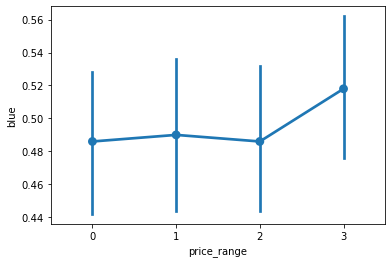

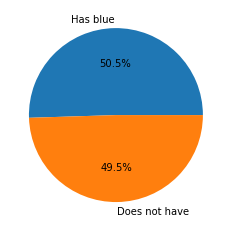

In [31]:
# Bluetooth vs Price Range

sns.pointplot(x="price_range", y="blue", data=train)

labels = ["Has blue",'Does not have']
values=train['blue'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,  autopct='%1.1f%%')
plt.show()

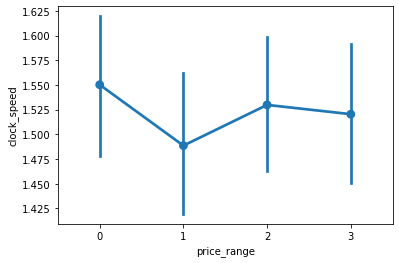

In [32]:
# Clock Speed vs Price Range


sns.pointplot(x="price_range", y="clock_speed", data=train)

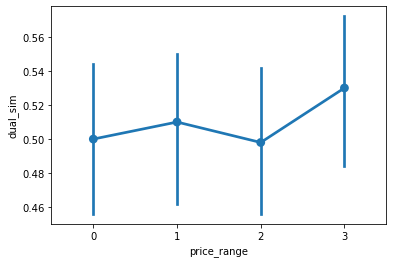

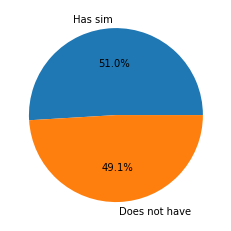

In [33]:
# Dual Sim vs Price Range

sns.pointplot(x="price_range", y="dual_sim", data=train)

labels = ["Has sim",'Does not have']
values=train['dual_sim'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,  autopct='%1.1f%%')
plt.show()

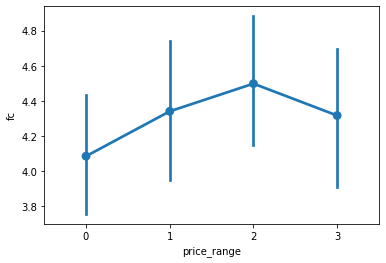

In [34]:
# Front Camera In Pixels vs Price Range

sns.pointplot(x="price_range", y="fc", data=train)

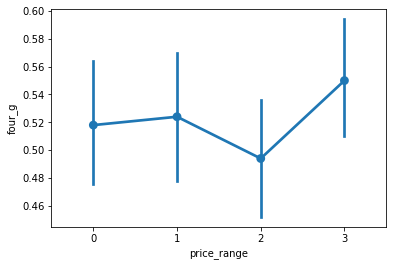

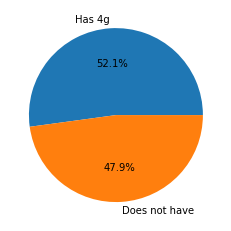

In [35]:
# Has 4G vs Price Range


sns.pointplot(x="price_range", y="four_g", data=train)

labels = ["Has 4g",'Does not have']
values=train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,  autopct='%1.1f%%')
plt.show()

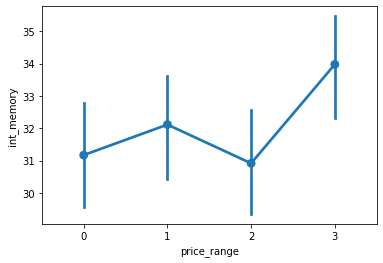

In [36]:
# Internal Memory vs Price Range

sns.pointplot(x="price_range", y="int_memory", data=train)

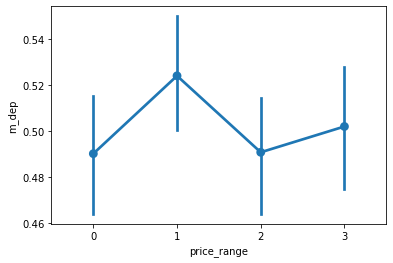

In [37]:
# Mobile Depth In cm vs Price Range

sns.pointplot(x="price_range", y="m_dep", data=train)

In [38]:
# Hence, this is enough to understand, every feature of our dataset

In [39]:
# Now using our data for predicting models

# Linear Regression

In [40]:
# Importing necessary libraries:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [41]:
# Let's start with Linear regression:

lr= LinearRegression()
lr.fit(x_train, y_train)

print("Test result of Linear Regression: ", lr.score(x_test, y_test))

print("Train result of Linear Regression: ", lr.score(x_train, y_train))

Test result of Linear Regression:  0.707882373689326
Train result of Linear Regression:  0.721613894974435


In [42]:
# Now predict the accuracy of this model:

y_predict= lr.predict(x_test)
ypredict=[]
for i in range(len(y_predict)):
    ypredict.append(int(y_predict[i]))
accuracy_score(y_test, ypredict)
accu=accuracy_score(y_test, ypredict)

print("Accuracy of Linear regression: ", accu)

Accuracy of Linear regression:  0.6483333333333333


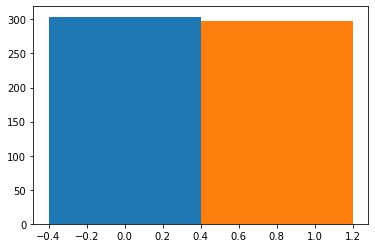

In [43]:
# Representing graphically:

plt.bar(np.add.reduce(x_test)+0.00, np.add.reduce(y_test))
plt.bar(np.add.reduce(x_test)+0.80, np.add.reduce(y_predict))
plt.show()

# Logistic Regression

In [44]:
# Importing necessary libraries:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve

In [45]:
# Let's start with Logistic regression:

logistic_regression= LogisticRegression()
logistic_regression.fit(x_train, y_train)
prediction= logistic_regression.predict(x_test)

print("Test result of Logistic Regression Model: ", logistic_regression.score(x_test, y_test))

print("Train result of Logistic Regression Model: ", logistic_regression.score(x_train, y_train))

Test result of Logistic Regression Model:  0.9766666666666667
Train result of Logistic Regression Model:  0.9914285714285714


In [46]:
# Now predict the accuracy of this model:
accuracy_logistic_regression=accuracy_score(y_test, prediction)
print("Accuracy of Logistic Regression Model: ", accuracy_logistic_regression)

print("AUC-ROC of Logistic Regression Model:", roc_auc_score(y_test, prediction))

Accuracy of Logistic Regression Model:  0.9766666666666667
AUC-ROC of Logistic Regression Model: 0.9769736842105263


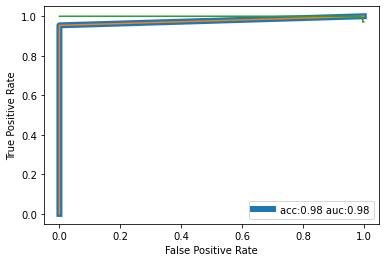

In [47]:
# Representing graphically

logistic_model_probability = LogisticRegression()

logistic_model_probability.fit(x_train, y_train)

prediction_probability = logistic_regression.predict_proba(x_test)


# Now let's create the ROC-curve and PR-curve to represent our model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fpr, tpr, _ = roc_curve(y_test, prediction)
acc = logistic_regression.score(x_test, y_test)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=6)
plt.legend(loc="best")

precision, recall, thresholds = precision_recall_curve(y_test, prediction_probability[:, 1])

plt.plot(fpr, tpr)

plt.plot(recall, precision)

# K-Nearest Neighbour

In [48]:
# importing necessary libraries:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Let's start with KNN:

knn = list()
test_knn = list()
train_knn = list()

for i in range(1, 201):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    knn.append(knn_model.predict(x_train))
    test_knn.append(knn_model.score(x_test, y_test))
    train_knn.append(knn_model.score(x_train, y_train))
    if i % 20 == 0:
        print("KNN predicted with ", i, " neighbours")

KNN predicted with  20  neighbours
KNN predicted with  40  neighbours
KNN predicted with  60  neighbours
KNN predicted with  80  neighbours
KNN predicted with  100  neighbours
KNN predicted with  120  neighbours
KNN predicted with  140  neighbours
KNN predicted with  160  neighbours
KNN predicted with  180  neighbours
KNN predicted with  200  neighbours


In [50]:
# Now predicting the accuracy of this model:

knn_accu= KNeighborsClassifier()
knn_accu.fit(x_train, y_train)
knn_prediction= knn_accu.predict(x_test)
acc_knn=accuracy_score(y_test, knn_prediction)

print("Accuracy of K-Nearest Neighbour Model: ", acc_knn)

Accuracy of K-Nearest Neighbour Model:  0.8216666666666667


In [51]:
# Finding max Train results:

print(" In KNN max train result: ", max(train_knn), " takes ", (train_knn.index(max(train_knn))+1), " neighbors")

# Finding max Test results:

print(" In KNN max test result: ", max(test_knn), " takes ", (test_knn.index(max(test_knn))+1), " neighbors")

 In KNN max train result:  1.0  takes  1  neighbors
 In KNN max test result:  0.955  takes  113  neighbors


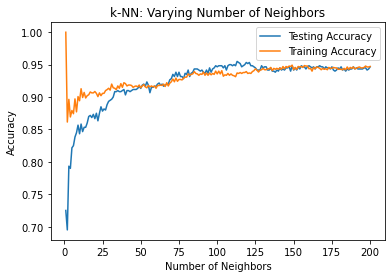

In [52]:
# Representing graphically:

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(np.arange(1,201), test_knn, label = 'Testing Accuracy')
plt.plot(np.arange(1,201), train_knn, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Decision Trees

In [53]:
# importing necessary libraries:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [54]:
# Let's start with Decision Trees using gini impurity(CART):

decision_tree= DecisionTreeClassifier(random_state= divide_seed)

decision_tree.fit(x_train, y_train)

predicted_decision_tree= decision_tree.predict(x_test)

print("Test result of Decision Trees Model: ", decision_tree.score(x_test, y_test))

print("Train result of Decision Trees Model: ", decision_tree.score(x_train, y_train))

Test result of Decision Trees Model:  0.9366666666666666
Train result of Decision Trees Model:  1.0


In [55]:
# Now predicting the accuracy and auc-roc of this model:

accuracy_decision_tree=accuracy_score(y_test, predicted_decision_tree)
print("Accuracy of Decision Tree Model: ", accuracy_decision_tree)

auc_roc_decision_tree= roc_auc_score(y_test, predicted_decision_tree)

print("AUC-ROC of Decision Tree Model: ", auc_roc_decision_tree)

Accuracy of Decision Tree Model:  0.9366666666666666
AUC-ROC of Decision Tree Model:  0.9369221194879089


In [56]:
# representing graphically:

text_representation= tree.export_text(decision_tree)

print(text_representation)

|--- feature_13 <= 0.12
|   |--- feature_13 <= -0.15
|   |   |--- feature_11 <= 1.93
|   |   |   |--- feature_0 <= 1.71
|   |   |   |   |--- feature_0 <= 1.06
|   |   |   |   |   |--- feature_11 <= 1.55
|   |   |   |   |   |   |--- feature_6 <= 1.57
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  1.57
|   |   |   |   |   |   |   |--- feature_13 <= -0.25
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_13 >  -0.25
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.18
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  0.18
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  1.55
|   |   |   |   |   |   |--- feature_11 <= 1.60
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_11 >  1.60
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  1.06
|   |   |   |   |   |--- feature_13 

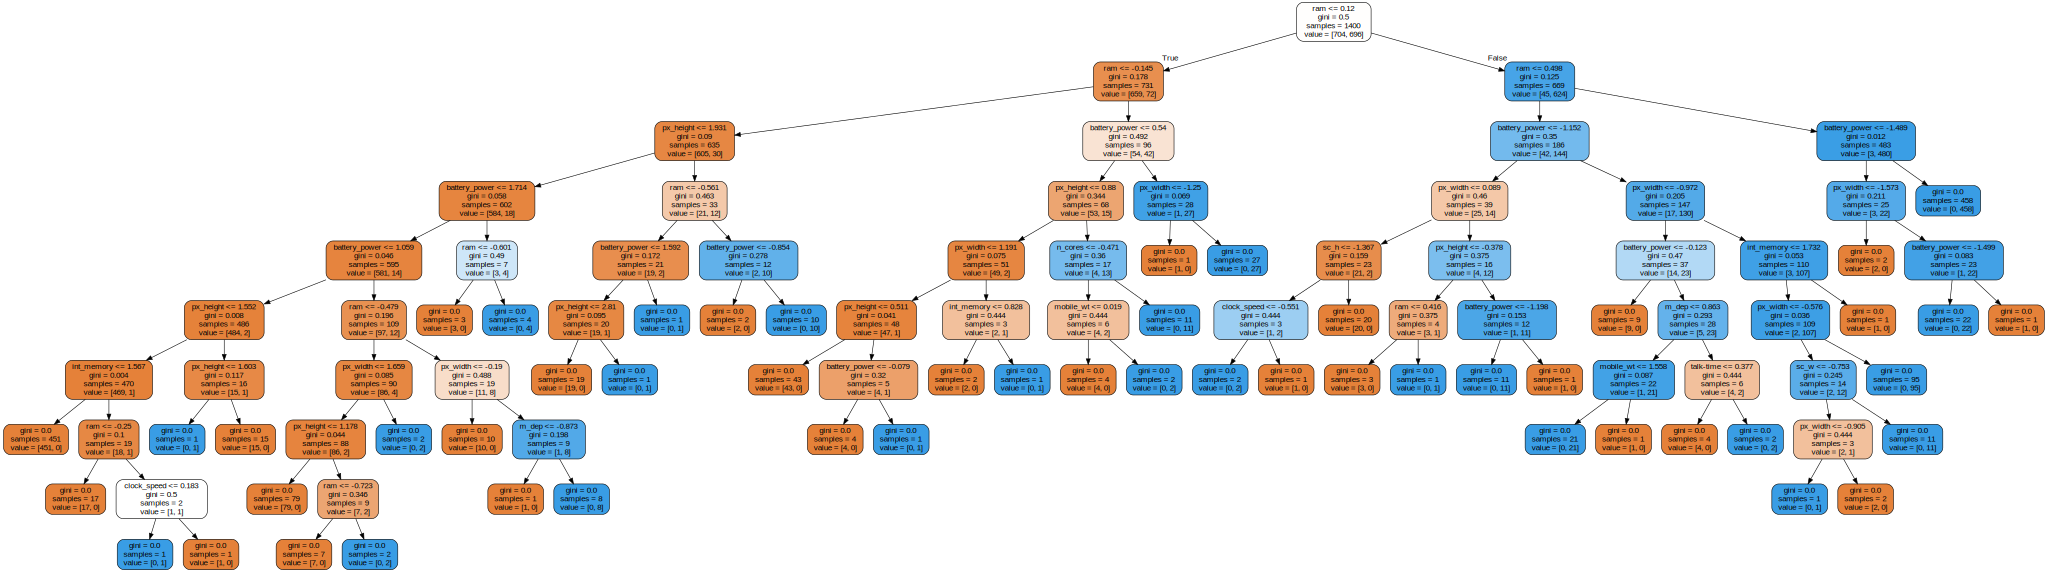

In [57]:
decision_tree_y= ['0', '1']

decision_tree_data_features_name= ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk-time', 'three_g', 'touch_screen', 'wifi']

dot_data = tree.export_graphviz(decision_tree, feature_names=decision_tree_data_features_name, out_file=None, filled=True, rounded=True)

graph= graphviz.Source(dot_data, format="png")
graph

# Random Forest Classifier or Random Decision Forests

In [58]:
# Importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
import time

In [59]:
# Let's start with Random Forest Classifier

test_random_forest_classifier= list()
train_random_forest_classifier= list()

accuracy_random_forest_classifier= list()
auc_roc_random_forest_classifier= list()

accuracy_random_forest_classifier_probability= list()
auc_roc_random_forest_classifier_probability= list()

time_random_forest_classifier= list()

start= time.time()
current_time= start

for l in range(10, 1010, 10):
    random_forest_classifier= RandomForestClassifier(random_state=divide_seed, n_estimators=l)
    random_forest_classifier_probability= RandomForestClassifier(random_state=divide_seed, n_estimators=l)
    random_forest_classifier.fit(x_train, y_train)
    random_forest_classifier_probability.fit(x_train, y_train)
    
    prediction_random_forest_classifier= random_forest_classifier.predict(x_test)
    prediction_random_forest_classifier_probability= random_forest_classifier_probability.predict_proba(x_test)[:, 1]
    
    test_random_forest_classifier.append(random_forest_classifier.score(x_test, y_test))
    train_random_forest_classifier.append(random_forest_classifier.score(x_train, y_train))
    
    accuracy_random_forest_classifier.append(accuracy_score(y_test, prediction_random_forest_classifier))
    accuracy_random_forest_classifier_probability.append(accuracy_score(y_test, prediction_random_forest_classifier_probability>0.5))
    
    auc_roc_random_forest_classifier_rfc= roc_auc_score(y_test, prediction_random_forest_classifier)
    auc_roc_random_forest_classifier.append(auc_roc_random_forest_classifier_rfc)
    auc_roc_random_forest_classifier_probability.append(roc_auc_score(y_test, prediction_random_forest_classifier_probability))
    
    if l%50==0:
        current_time= time.time() - current_time
        if l%100 !=0:
            time_random_forest_classifier.append(current_time)
            print("Number of Random Forest Classifier Trees: ", l)
            print("Prediction completed by", l/10, "%")
            print("Took", current_time, " seconds")
            print("-------------------------")
print("Prediction completed by 100%")
finish= time.time() - start
    
print("Prediction took ", finish, " seconds")

Number of Random Forest Classifier Trees:  50
Prediction completed by 5.0 %
Took 1.729931354522705  seconds
-------------------------
Number of Random Forest Classifier Trees:  150
Prediction completed by 15.0 %
Took 8.881101608276367  seconds
-------------------------
Number of Random Forest Classifier Trees:  250
Prediction completed by 25.0 %
Took 21.00308084487915  seconds
-------------------------
Number of Random Forest Classifier Trees:  350
Prediction completed by 35.0 %
Took 38.46849346160889  seconds
-------------------------
Number of Random Forest Classifier Trees:  450
Prediction completed by 45.0 %
Took 58.445234298706055  seconds
-------------------------
Number of Random Forest Classifier Trees:  550
Prediction completed by 55.0 %
Took 87.35708618164062  seconds
-------------------------
Number of Random Forest Classifier Trees:  650
Prediction completed by 65.0 %
Took 119.13551712036133  seconds
-------------------------
Number of Random Forest Classifier Trees:  750
P

In [60]:
# Finding max train results:

print("In Random forest Classifier max train results: ", max(train_random_forest_classifier), " takes", (train_random_forest_classifier.index(max(train_random_forest_classifier))+1)*10, " trees")

In Random forest Classifier max train results:  1.0  takes 20  trees


In [61]:
# Finding max train results:

print("In Random forest Classifier max test results: ", max(test_random_forest_classifier), " takes", (test_random_forest_classifier.index(max(test_random_forest_classifier))+1)*10, " trees")

In Random forest Classifier max test results:  0.9483333333333334  takes 60  trees


In [62]:
#Finding accuracy of Random Forest Classifier

accuracy_ran_for=max(accuracy_random_forest_classifier)
print("In Random Forest Classifier max accuracy results: ", max(accuracy_random_forest_classifier), " takes", (accuracy_random_forest_classifier.index(max(accuracy_random_forest_classifier))+1)*10, " trees")

print()

#Finding accuracy with probability of Random Forest Classifier

print("In Random Forest Classifier max accuracy with probability results: ", max(accuracy_random_forest_classifier_probability), " takes", (accuracy_random_forest_classifier_probability.index(max(accuracy_random_forest_classifier_probability))+1)*10, " trees")

In Random Forest Classifier max accuracy results:  0.9483333333333334  takes 60  trees

In Random Forest Classifier max accuracy with probability results:  0.9483333333333334  takes 60  trees


In [63]:
#Finding auc-roc of Random Forest Classifier

print("In Random Forest Classifier max auc-roc results: ", max(auc_roc_random_forest_classifier), " takes", (auc_roc_random_forest_classifier.index(max(auc_roc_random_forest_classifier))+1)*10, " trees")

print()

#Finding auc-roc with probability of Random Forest Classifier

print("In Random Forest Classifier max auc-roc with probability results: ", max(auc_roc_random_forest_classifier_probability), " takes", (auc_roc_random_forest_classifier_probability.index(max(auc_roc_random_forest_classifier_probability))+1)*10, " trees")

In Random Forest Classifier max auc-roc results:  0.9487019914651492  takes 60  trees

In Random Forest Classifier max auc-roc with probability results:  0.993659983997155  takes 1000  trees


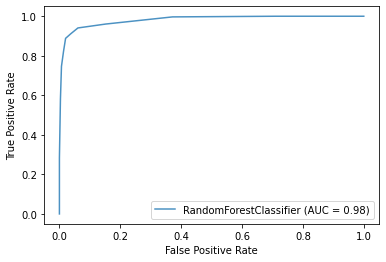

In [64]:
# Representing graphically
rfc = RandomForestClassifier(n_estimators=10, random_state=divide_seed)
rfc.fit(x_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

# Support Vector Machine Classifier Or SVM

In [65]:
# Importing necessary libraries

from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics

In [66]:
# Create a SVM Classifier

# Linear kernel

svm_kernel= svm.SVC(kernel='linear')

In [67]:
# Training the model using the training sets

svm_kernel.fit(x_train, y_train)

SVC(kernel='linear')

In [68]:
# Predict the response for test dataset

y_predict_svm= svm_kernel.predict(x_test)

In [69]:
# SVM accuracy: how often is the classifier correct?

accuracy_svm_model= metrics.accuracy_score(y_test, y_predict_svm)
print("Accuracy of SVM model: ", accuracy_svm_model)

Accuracy of SVM model:  0.98


In [70]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision of SVM model: ",metrics.precision_score(y_test, y_predict_svm))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall of SVM model: ",metrics.recall_score(y_test, y_predict_svm))

Precision of SVM model:  1.0
Recall of SVM model:  0.9605263157894737


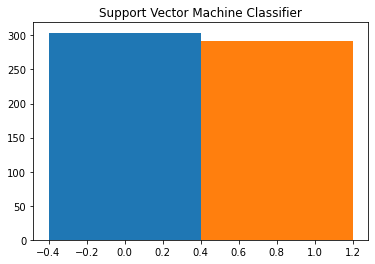

In [71]:
# Representing graphically

plt.title('Support Vector Machine Classifier')
plt.bar(np.add.reduce(x_test)+0.00, np.add.reduce(y_test))
plt.bar(np.add.reduce(x_test)+0.80, np.add.reduce(y_predict_svm))
plt.show()

# Concluding The Best Model

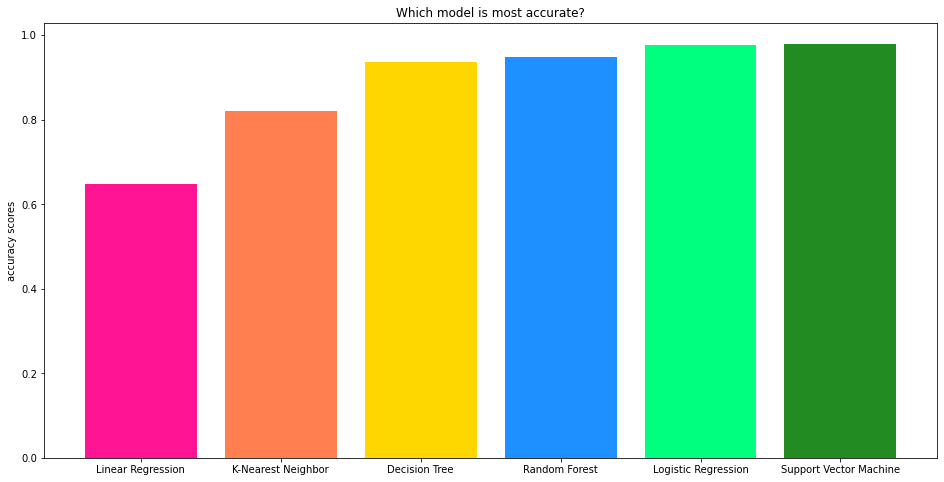

In [89]:
models= ['Linear Regression', 'K-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine']
acc_scores= [accu, acc_knn, accuracy_decision_tree, accuracy_ran_for, accuracy_logistic_regression, accuracy_svm_model]

plt.figure(figsize=(16, 8))
plt.bar(models, acc_scores, color=['deeppink', 'coral', 'gold', 'dodgerblue', 'springgreen', 'forestgreen'], )
plt.ylabel("accuracy scores")
plt.title("Which model is most accurate?")
plt.show()

In [90]:
# Hence from the above we can conclude that Logistic Regression is the best model

# Applying Best Model On Test Dataset

In [91]:
#Now, we will load the testing dataset and preview it

test=pd.read_csv(r'C:\Users\PC\Jupyter Notebooks\Prediction Of Phone Prices\test.csv')
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [93]:
test.shape

(1000, 21)

In [94]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same.

test1=test.drop('id',axis=1)

In [95]:
# Finding the total size of Test Dataset

print("Test Dataframe size:")
test1.shape

Test Dataframe size:


(1000, 20)

In [96]:
# Printing concise summary of our dataset or Data Analysis:
# Testing Dataset

test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [97]:
# Generating the descriptive statistics of out dataset:
# Testing Dataset:

test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [98]:
# Generating the descriptive statistics of out dataset:
# Testing Dataset:

test1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [99]:
# Now, again seeing our Test dataset

test1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [100]:
print("Test Dataframe size:")
test1.shape

Test Dataframe size:


(1000, 20)

In [103]:
# Predicting price range for test dataset:

predicted_price_range= svm_kernel.predict(test1)

# We are able to forecast test dataset labels:

# predicted_price_range

In [104]:
# Updating the price range in test dataset

test1['price_range'] = predicted_price_range

In [105]:
# Seeing test dataset after update

test1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,1
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,1
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,1
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [106]:
# Hence, binary module completed.